`04지도학습_회귀.pdf`


3. Scikilearn 으로 보스턴 주택가격 데이터 회귀분석
4. statmodels 패키지로 선형회귀 분석

In [17]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
# import matplotlib.pylab as plt
import matplotlib.font_manager as fm
%matplotlib inline

plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'  # Mac (AppleGothic 또는 AppleSDGothicNeo)
# plt.rcParams['font.family'] = 'NanumGothic' # Linux (NanumGothic 또는 다른 설치된 한글 폰트)

plt.rcParams['axes.unicode_minus'] = False #glypy 8722: Axes에 - 표시 안되는 것
plt.title('한글 타이틀...')

Text(0.5, 1.0, '한글 타이틀...')

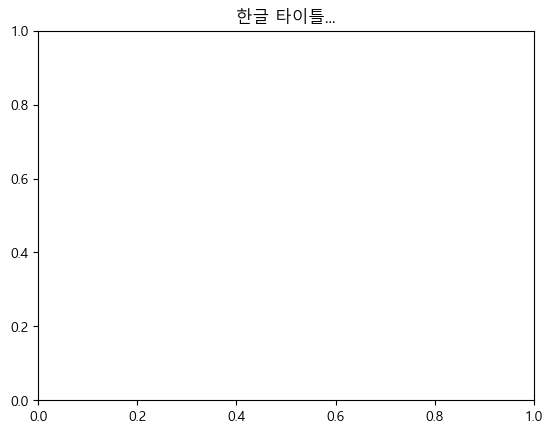

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'Malgun Gothic'

plt.rcParams['axes.unicode_minus'] = False #glypy 8722: Axes에 - 표시 안되는 것
plt.title('한글 타이틀...')

# Scikilearn 으로 보스턴 주택가격 데이터 회귀분석


<img src='https://i.imgur.com/WuRWciF.png' width=700>

### 데이터 (원본)

bostong housing price 원본 데이터


In [ ]:
# boston housing price 원본 데이터
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_142848/1047431430.py:6: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


In [2]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']

In [20]:
boston_df = pd.DataFrame(data, # 학습 데이터
                        columns=feature_names)
boston_df['TARGET'] = target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
bos = pd.DataFrame(data, columns=feature_names)
bos['TARGET'] = target
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


데이터 피처의 속성의미는:

- CRIM: 지역별 범죄 발생률
- ZN: 25000평방미터를 초과하는 거주 지역의 비율
- INDUS: 비상업 지역 넓이 비율
- CHAS:찰스강에 대한 더미 변수 (강의 경계에 위치한 경우 1, 아니면 0)
- NOX: 일산화질소 농도
- RM: 거주할 수 있는 방의 개수
- AGE: 1940년 이전에 건축된 소유 주택의 비율
- RAD: 고속도록 접근 용이성
- TAX: 10000달러 당 재산세 비율
- PTRATIO: 지역의 교사와 학생 수 비율
- B: 지역의 흑인 거주 비율
- LSTAT: 하위 계층의 비율
- TARGET: 주택 가격

#### 주요 피처 확인하기

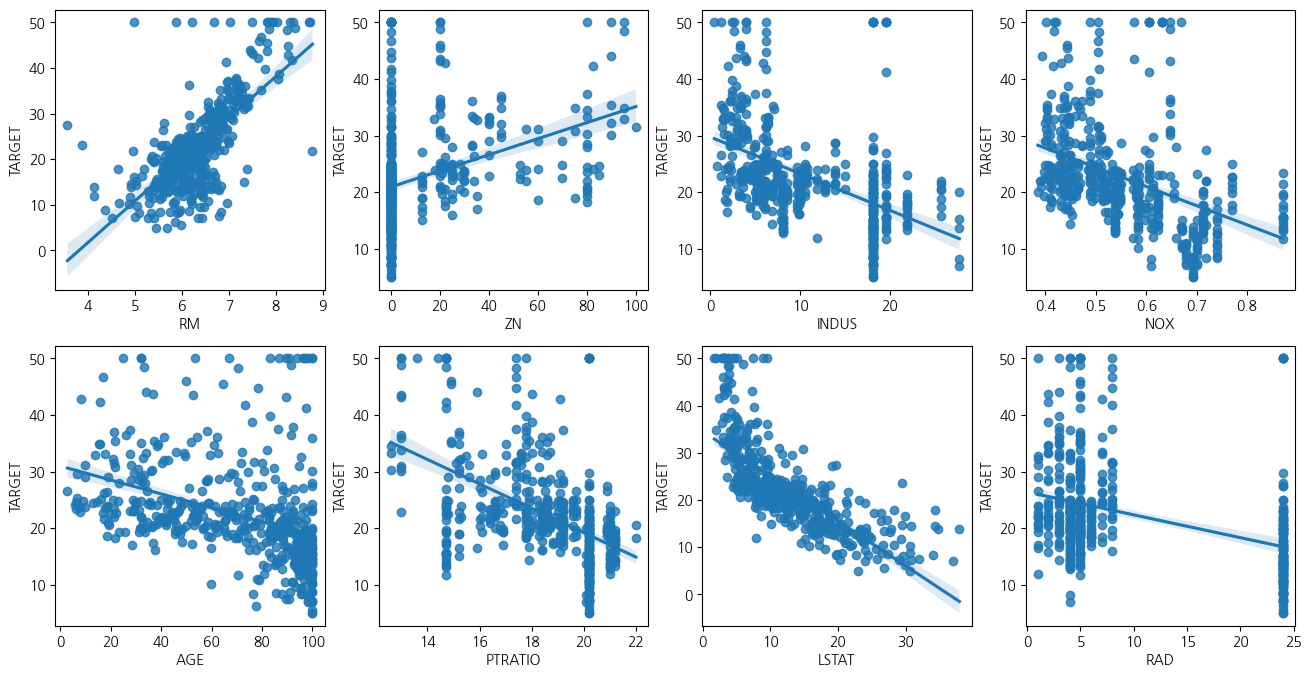

In [ ]:
import seaborn as sns

# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.







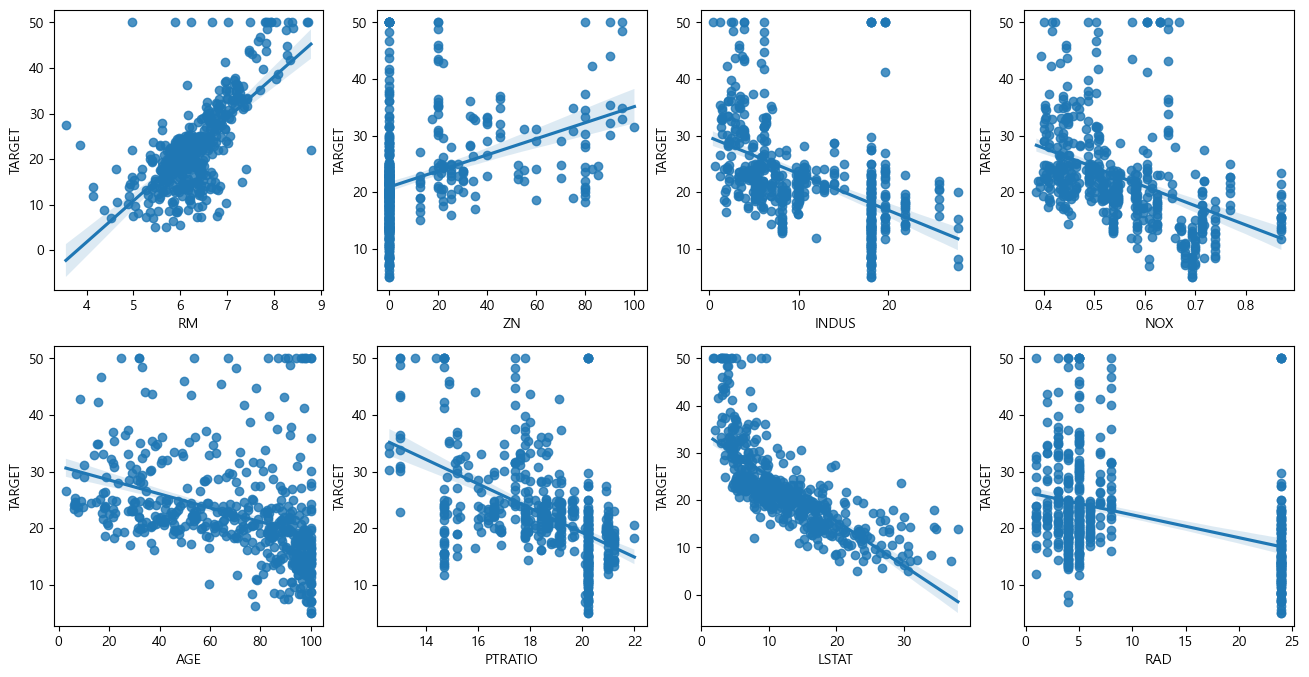

In [11]:
import seaborn as sns

lm_features=['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
fig,axs=plt.subplots(figsize=(16,8), ncols=4,nrows=2)

for i, feature in enumerate(lm_features):
    row=int(i/4)
    col=i%4
    # print(row,col)
    # print(i,feature)
    sns.regplot(ax=axs[row][col],data=bos,x=feature,y='TARGET')


파이썬 연속 데이터 : 배열, collection, iterable

- 순서대로 배치

주요 피처의 산점도와 회귀직선을 보면 RM, LSTAT 의 PRICE 영향도가 가장 두드러 지는 것으로 보인다.
 - RM 방크기: 방의 크기가 클수록 가격이 증가하는 **양방향의 선형성(Positive linearity)**를 보인다.
 - LSTAT 하위계측 비율: LSTAT이 적을수록 PRICE가 증가하는 **음 방향의 선형성**을 보인다.

# 1. 단일 특성 선형회귀 분석

선형회귀 분석이란 선형모델 예측과 평가를 수행하는 것이다. 여기서 RM 변수와 target과의 회귀 관계를 분석해 보자.


#### `RM` 지표

LinearRgression으로 보스턴 주택 데이터에서회귀 모델을 만들고  RM 피처 평가지표를 검토해 보자

In [ ]:
# X_train = data[:, 5]# 학습 데이터의 전체 행, 5번 열
X_train =  # RM 열
y_train =  # target 데이터

In [17]:
# X_train = data[:, 5]# 학습 데이터의 전체 행, 5번 열
X_train = bos.RM.values
y_train = target

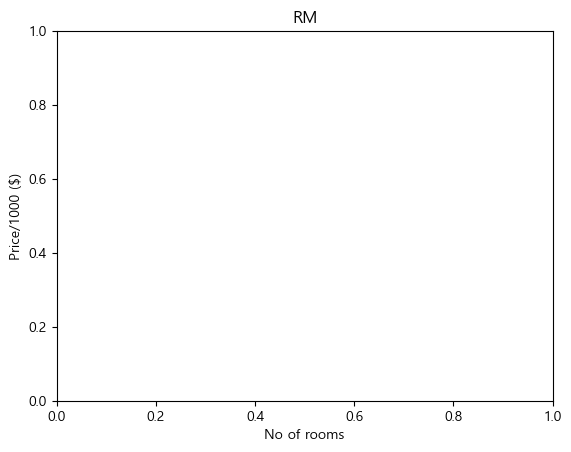

In [19]:
import matplotlib.pyplot as plt

plt.xlabel("No of rooms")
plt.ylabel("Price/1000 ($)")
plt.title('RM')
plt.show()

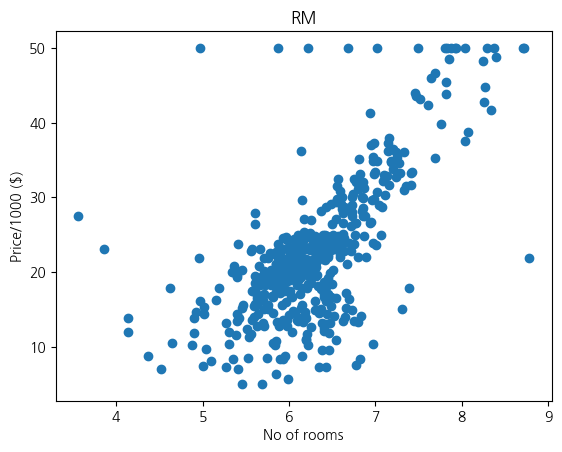

In [ ]:
import matplotlib.pyplot as plt

# X_train, target 산점도 그리기


plt.xlabel("No of rooms")
plt.ylabel("Price/1000 ($)")
plt.title('RM')
plt.show()

모델 작성과 학습

In [67]:
X_train.shape

(506,)

In [ ]:
# Linear Regression OLS로 학습/예측/평가 수행. 
from sklearn.linear_model import LinearRegression

#LinearRegression


# 학습 진행


# 최종 목적은 회귀 선을 위한 가중치와 절편을 구하는 것



모델의 가중치: [9.10210898]
모델의 절편: -34.67062077643857


LinearRegressor의 OLS로 해는 아래 식으로 y를 예측 한다는 것이다.

$$
\hat{y} = -34.67 + 9.1 x
$$

만들어진 모델의 회귀선 확인

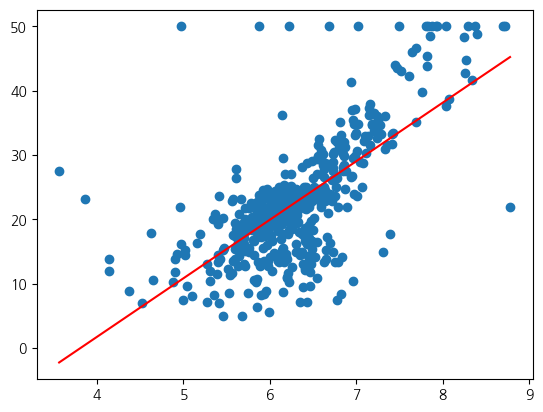

In [ ]:
# 실제 학습 데이터와 회귀선
import numpy as np
# X축


# X_train, target 산점도를 그려 봅니다.

# 회귀선 
# 우리 모델의 예측값



plt.show()

#### 단일특성 평가지표

- MSE
- RMSE
- R2

In [ ]:
# X_train
y_pred = lg_clf.predict(X_train.reshape(-1,1))

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error





r2 score : 0.48352545599133423
MAE     : 4.4477729015322325
MSE     : 43.60055177116956
RMSE   : 6.603071389222561


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
r2_score(y_train,y_pred)
mean_absolute_error(y_train,y_pred)
mean_squared_error(y_train,y_pred)
np.sqrt(mean_absolute_error(y_train,y_pred))


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 'LSTAT' 특성만 사용하여 독립 변수(X)와 종속 변수(y)를 정의합니다.
X = bos[['LSTAT']]
y = bos['TARGET']

# 데이터를 학습 세트와 테스트 세트로 분리합니다. (테스트 세트 비율 20%)
# random_state를 고정하여 항상 동일한 분할 결과를 얻습니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 객체를 생성합니다.
model = LinearRegression()

# 학습 데이터를 사용하여 모델을 학습시킵니다.
model.fit(X_train, y_train)

# 학습된 모델을 사용하여 테스트 세트의 집값을 예측합니다.
y_pred = model.predict(X_test)

# 모델의 평가지표를 산출합니다.
# 1. 평균 제곱 오차 (Mean Squared Error, MSE)
mse = mean_squared_error(y_test, y_pred)
# 2. 평균 제곱근 오차 (Root Mean Squared Error, RMSE) - MSE의 제곱근
rmse = np.sqrt(mse)
# 3. 결정 계수 (R-squared, R2 Score) - 모델의 설명력을 나타내는 지표
r2 = r2_score(y_test, y_pred)

# 산출된 평가지표를 출력합니다.
print(f"\n'LSTAT' 특성을 사용한 보스턴 집값 예측 모델의 평가지표:")
print(f"  평균 제곱 오차 (MSE): {mse:.2f}")
print(f"  평균 제곱근 오차 (RMSE): {rmse:.2f}")
print(f"  결정 계수 (R-squared): {r2:.2f}")

# 모델의 회귀 계수(기울기)와 절편도 확인할 수 있습니다.
print(f"\n모델의 회귀 계수 (Coefficient): {model.coef_[0]:.2f}")
print(f"모델의 절편 (Intercept): {model.intercept_:.2f}")



'LSTAT' 특성을 사용한 보스턴 집값 예측 모델의 평가지표:
  평균 제곱 오차 (MSE): 33.52
  평균 제곱근 오차 (RMSE): 5.79
  결정 계수 (R-squared): 0.54

모델의 회귀 계수 (Coefficient): -0.97
모델의 절편 (Intercept): 34.84


회귀 계수 (기울기): -0.9665
절편: 34.8369

R² 점수: 0.5429


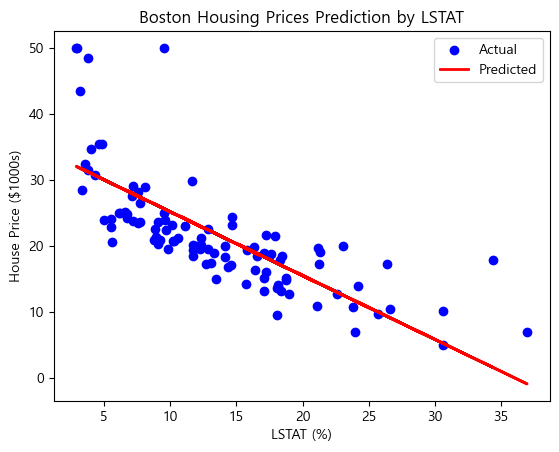

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 데이터 준비
X = bos[['LSTAT']].values  # 특징 데이터 (2D 배열로 변환)
y = bos['TARGET'].values    # 타겟 값

# 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

# 예측
y_pred = lr.predict(X_test)

# 회귀 계수 및 절편 출력
print(f"회귀 계수 (기울기): {lr.coef_[0]:.4f}")
print(f"절편: {lr.intercept_:.4f}")

# R² 점수 계산 (모델 평가)
r2 = r2_score(y_test, y_pred)
print(f"\nR² 점수: {r2:.4f}")

# 결과 시각화
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('LSTAT (%)')
plt.ylabel('House Price ($1000s)')
plt.title('Boston Housing Prices Prediction by LSTAT')
plt.legend()
plt.show()

# 2. 다중 특성 선형 회귀 분석

boston 데이터 셋 모든 특성을 이용한 다중 특성 데이터 예측

특성이 n개 일 경우에 (다항식) 알아야 할 파라미터는 n+1 개 이다. Scikit-learn 은 다변수(다항)도 동일하게 다룰 수 있다.

In [ ]:
from sklearn.model_selection import train_test_split

# data, target 을 7:3으로 훈련데이터로 분할






In [ ]:
# 학습 진행
# 학습 데이터와 학습 라벨

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# 가중치와 절편




가중치: [-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
 -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
  2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
 -5.47113313e-01]
절편: 31.631084035692577


### 선형회귀 평가

회귀계수 coef_ 에 피처 값을 매핑하고 큰 값 순서로 출력해 보면 - RM 이 양의 값으로 가장 크고, NOX 가 음 값이 너무 커 보인다.

In [ ]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의




RM          4.1
CHAS        3.1
RAD         0.2
INDUS       0.0
ZN          0.0
B           0.0
TAX        -0.0
AGE        -0.0
CRIM       -0.1
LSTAT      -0.5
PTRATIO    -0.9
DIS        -1.4
NOX       -15.4
dtype: float64

In [ ]:
# X_test 예측



In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error





r2 score : 0.71122600574849
MAE     : 3.162709871457429
MSE     : 21.51744423117745
RMSE   : 4.638689926172846


In [ ]:
# 모델 검증




훈련 세트 점수: 0.74
테스트 세트 점수: 0.71


### - 샘플 예측

작은 세트로 예측 수행 - 보스턴 데이터 셋의 첫번째 데이터와 타겟

In [ ]:
# 1개의 학습 데이터




데이터 셋 관측치: [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
 7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
 9.1400e+00]
데이터 셋 label: 21.6


In [ ]:
# 모델이 예측한 1개 학습 데이터 예측치
print("예측:", reg_all.predict(data[1].reshape(1, 13)) )

예측: [24.90986918]


# 모델 저장과 탑재

여기서 joblib 을 사용해 모델을 저장하고 다시 탑재해 보자

In [24]:
%pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lg_all=LinearRegression()
lg_all.fit(X_train,y_train)

import joblib
model_filename='boston_lg_clf.joblib'
joblib.dump(lg_all,model_filename)

['boston_lg_clf.joblib']

In [ ]:
loaded_model=None
try:
    loaded_model=joblib.load(model_filename)
except FileNotFoundError as e:
    print(e)

In [31]:
sample_train=data[1].reshape(1,13)
sample_y=target[1]

In [36]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [37]:
len(bos['LSTAT'].values)

506

In [38]:
len(bos[['LSTAT']].values)

506

In [43]:
bos.drop(columns=['TARGET'])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [44]:
# X: 13개 모든 feature 사용
X = bos.drop(columns=['TARGET'])
y = target

# 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
lg_all = LinearRegression()
lg_all.fit(X_train, y_train)

# 모델 저장
model_filename = 'boston_lg_clf.joblib'
joblib.dump(lg_all, model_filename)

# 모델 불러오기
loaded_model = None
try:
    loaded_model = joblib.load(model_filename)
except FileNotFoundError as e:
    print(e)

# 예측용 샘플 준비 (13개 feature)
sample_train = data[1].reshape(1, 13)
sample_y = target[1]

# 예측
pred = loaded_model.predict(sample_train)
print('정답:', sample_y)
print('예측:', pred[0])


정답: 21.6
예측: 25.18152388189077


c:\Users\ksa\stenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import joblib

# joblib을 사용하여 모델 저장


['boston_lg_clf.pkl']

boston_lg_clf.pkl


In [ ]:

# joblib을 사용하여 모델 불러오기




모델이 'boston_lg_clf.pkl' 파일에서 성공적으로 불러와졌습니다.


In [ ]:
# 앞의 다중특성 예에서 사용한 원본 데이터 data 사용



In [ ]:
# 불러온 모델로 예측




정답 21.6 : 예측: [24.90986918]


---

참고
 - ML교안11-Supervised-learning-with-scikit-learn.pdf
 - Machine Learning with Python Sklearn